In [7]:
# Importing the dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Finding the file needed for analysis
file = 'Resources/Cleaned_data.csv'
df = pd.read_csv(file)
df

C:\Users\Kevin\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (9,12,15,17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,127128,1990,1,1,DAL,DELTA AIR LINES,B-757-200,A,148,26,...,0,0,0,0,1,1,0,0,0,0
1,129779,1990,1,1,HAL,HAWAIIAN AIR,DC-9,A,583,90,...,0,0,0,0,0,0,0,0,1,0
2,2258,1990,1,3,MIL,MILITARY,A-10A,A,345,NaN,...,0,0,0,0,0,0,0,0,0,0
3,2257,1990,1,3,MIL,MILITARY,F-16,A,561,NaN,...,0,0,0,0,0,0,0,0,0,0
4,129734,1990,1,4,HAL,HAWAIIAN AIR,DC-9,A,583,90,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133551,366091,2015,9,30,SWA,SOUTHWEST AIRLINES,B-737-700,A,148,42.0,...,0,0,0,0,0,0,0,0,0,0
133552,365902,2015,9,30,SWA,SOUTHWEST AIRLINES,B-737-700,A,148,42.0,...,0,0,0,0,0,0,0,0,0,0
133553,365903,2015,9,30,BUS,BUSINESS,CITATIONJET,A,226,49.0,...,1,1,0,0,0,0,0,0,0,0
133554,366046,2015,9,30,QXE,HORIZON AIR,DHC8 DASH 8,A,303,10.0,...,1,0,0,0,0,0,0,0,0,0


In [3]:
# Selecting what is needed.
df = df[['Record ID','Species ID','Species Name','Species Quantity',
        'Fatalities','Injuries',]]
df.head()

,Record ID,Species ID,Species Name,Species Quantity,Fatalities,Injuries
0,127128,NE1,GULL,1,0.0,0.0
1,129779,ZZ201,HOUSE SPARROW,1,0.0,0.0
2,2258,UNKBM,UNKNOWN BIRD,1,0.0,0.0
3,2257,ZX,FINCH,1,0.0,0.0
4,129734,ZY1,MUNIAS,1,0.0,0.0


In [4]:
# Creating two dataframes that are different. Between unknown birds and known birds
unknown_bird_df = df.loc[(df['Species Name'] == 'UNKNOWN BIRD')]
known_df = df.loc[(df['Species Name']!= 'UNKNOWN BIRD')]

# Shows the amount of rows.
print(len(unknown_bird_df))
print(len(known_df))

79313
54243


In [5]:
# New dataframe for pie chart
summ_inc = pd.DataFrame([len(unknown_bird_df),len(known_df)],['Unknown','Known'])
summ_inc.rename(columns = {0: 'Count1'})

,Count1
Unknown,79313
Known,54243


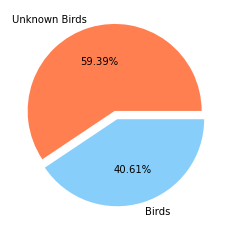

In [6]:
# Creating the labels
labels = ['Unknown Birds','Birds']
sizes = summ_inc[0]
colors = ['coral','lightskyblue']
explode = (0.05,0.05)

# Creates the pie chart and saves it.
plt.pie(sizes,explode = explode, labels = labels, colors = colors, autopct = '%.2f%%')
plt.savefig('output/birds_pie')
plt.show()

In [7]:
# Finds the birds and their frequency
bird_group = known_df.groupby('Species Name')['Record ID'].count().sort_values(ascending = False)
bird_clean = bird_group.nlargest(10)
bird_clean

Species Name
GULL                 5839
MOURNING DOVE        3243
SPARROW              2442
EUROPEAN STARLING    2436
BARN SWALLOW         2351
HORNED LARK          1797
ROCK PIGEON          1752
KILLDEER             1662
CANADA GOOSE         1420
AMERICAN KESTREL     1400
Name: Record ID, dtype: int64

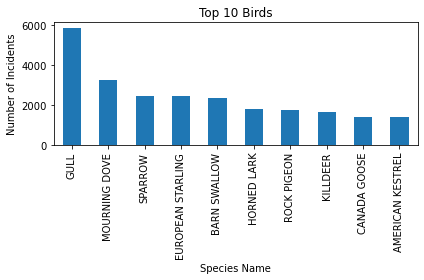

In [8]:
# Bar plot creation
bird_clean.plot.bar()

plt.figsize = (10,8)
plt.xlabel('Species Name')
plt.ylabel('Number of Incidents')
plt.title('Top 10 Birds')
plt.tight_layout()

# Saves the plot and shows it.
plt.savefig('output/birds_bar')
plt.show()

In [9]:
# Shows the flock size.
quantity = df.groupby('Species Quantity')['Species ID'].count().sort_values(ascending = False)
quantity

Species Quantity
1           109206
2-10         18865
11-100        1072
Over 100        44
Name: Species ID, dtype: int64

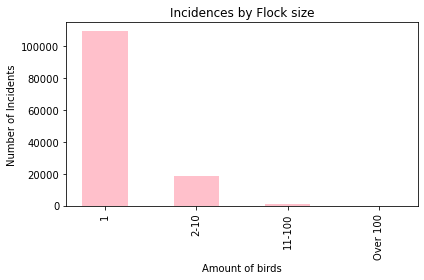

In [10]:
# Creates a bar chart about the incidents
flock_type = ['1','2-10','11-100','Over 100']
x_axis = np.arange(0,len(quantity))
plt.bar(x_axis, quantity , width = .5, color = 'pink', alpha = 1 ,align = 'center')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, flock_type ,rotation = 'vertical')

plt.figsize = (10,8)
plt.xlabel('Amount of birds')
plt.ylabel('Number of Incidents')
plt.title('Incidences by Flock size')
plt.tight_layout()

# Saves the chart and shows it.
plt.savefig('output/all_inc_bar')
plt.show()

In [11]:
# Shows flock size of only known birds.
quantity2 = known_df.groupby('Species Quantity')['Species ID'].count().sort_values(ascending = False)
quantity2

Species Quantity
1           39866
2-10        11019
11-100        829
Over 100       35
Name: Species ID, dtype: int64

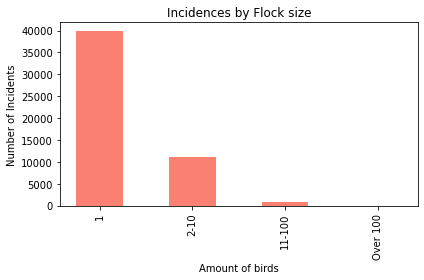

In [12]:
# Creates a bar chart about the incidents
flock_type = ['1','2-10','11-100','Over 100']
x_axis = np.arange(0,len(quantity2))
plt.bar(x_axis, quantity2 , width = .5, color = 'salmon', alpha = 1 ,align = 'center')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, flock_type ,rotation = 'vertical')

plt.figsize = (10,8)
plt.xlabel('Amount of birds')
plt.ylabel('Number of Incidents')
plt.title('Incidences by Flock size')
plt.tight_layout()

# Saves the chart and shows it.
plt.savefig('output/known_inc_bar')
plt.show()

In [13]:
# Sorts the frequency by birds.
bird_names = ['MOURNING DOVE','GULL','KILLDEER','AMERICAN KESTREL','BARN SWALLOW','HORNED LARK',
              'EUROPEAN STARLING','SPARROW','ROCK PIGEON','RED-TAILED HAWK']
clean_bird_df = known_df.loc[df['Species Name'].isin(bird_names)]
clean_bird_quant = clean_bird_df.groupby(['Species Name','Species Quantity'])['Record ID'].count()
clean_bird_quant

Species Name       Species Quantity
AMERICAN KESTREL   1                   1312
                   11-100                 1
                   2-10                  79
BARN SWALLOW       1                   1727
                   11-100                19
                   2-10                 502
EUROPEAN STARLING  1                   1361
                   11-100               206
                   2-10                 835
                   Over 100              19
GULL               1                   4312
                   11-100                70
                   2-10                1435
                   Over 100               5
HORNED LARK        1                   1134
                   11-100                19
                   2-10                 383
KILLDEER           1                   1282
                   11-100                13
                   2-10                 245
MOURNING DOVE      1                   2251
                   11-100               

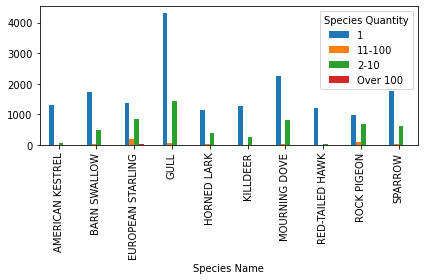

In [14]:
# Creates the bar plot.
bar_attempt = clean_bird_df.groupby(['Species Name','Species Quantity'])['Record ID'].count().unstack('Species Quantity').plot.bar()
plt.tight_layout()

# Saves the bar plot.
plt.savefig('output/Inc_by_quant')
plt.show()